In [1]:
!pwd

/home/av555/iclr


In [2]:
import sys
sys.path.append('/home/av555/iclr/')

In [3]:
from architectures import *
from trainer import *
from loaders import *
from models import *
from utils import *

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import torch

In [5]:
!ls iclr/exps/

ls: cannot access iclr/exps/: No such file or directory


Identifying best epoch

In [6]:
exp_path = "/home/av555/iclr/exps_no_distance_scaling/convCNP_germany/"
losses = np.load(exp_path+"losses.npy")

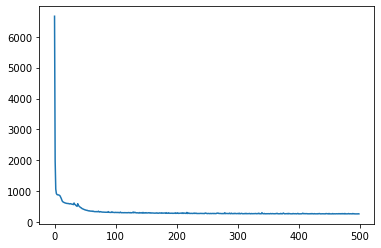

In [7]:
plt.plot(losses)

In [10]:
losses[496]

263.90330674913196

In [9]:
np.argmin(losses)

496

## Germany

In [8]:
def load_model(path, model):

    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']

    model.eval()
    return model, epoch, loss


In [9]:
def eval_model(model, val_loader):
    preds = []
    targets = []

    with torch.no_grad():
        for task in val_loader:
            task["dists"] = task["dists"][0,...]
            out = model(task)
            preds.append(out)
            targets.append(task["y_target"])

    #concat full arrays
    preds = torch.cat(preds, dim = 1)
    targets = torch.cat(targets, dim = 0)

    #To cpu
    preds = preds.cpu().numpy()
    targets = targets.cpu().numpy()

    return preds, targets

    

In [10]:
def get_val_stats_bs(predictions, targets):
        

        maes = np.zeros(predictions.shape[1])
        spearmans = np.zeros(predictions.shape[1])
        pearsons = np.zeros(predictions.shape[1])

        for st in range(predictions.shape[1]):
            # Get station
            true_mean = targets[:, st]
            pred_mean = predictions[:, st,0]
            # Remove nans
            pred_mean = pred_mean[~np.isnan(true_mean)]
            true_mean = true_mean[~np.isnan(true_mean)]

            try:
                maes[st] = np.mean(np.abs(true_mean - pred_mean))
                pearsons[st] = scipy.stats.pearsonr(pred_mean, true_mean)[0]
                spearmans[st] = scipy.stats.spearmanr(pred_mean, true_mean).correlation
            except:
                maes[st] = np.nan
                pearsons[st] = np.nan
                spearmans[st] = np.nan
                continue
        print("Mean absolute error: {}".format(np.nanmedian(maes)))
        print("Pearson correlation: {}".format(np.nanmedian(pearsons)))
        print("Spearman correlation: {}".format(np.nanmedian(spearmans)))
        


In [11]:
use_cpu = True
device = torch.device('cpu') if use_cpu else torch.device('cuda')

In [12]:
# data
test_inds = np.load("/home/av555/iclr/data/test_inds.npy")
train_inds = np.load("/home/av555/iclr/data/train_inds.npy")


val_ds = GermanyRandomExperimentDataset(100, test_inds, train_inds, "/home/av555/iclr/data/", device=device, train=False)
val_loader = DataLoader(
    val_ds, batch_size = 16, shuffle = False)

In [12]:
# ConvCNP

convcnp_path = "/home/av555/iclr/exps_no_distance_scaling/convCNP_germany/epoch_496"
concnp_model = convCNP(
    in_channels=25)

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)
get_val_stats_bs(convcnp_preds, convcnp_targets)

/home/av555/iclr/loaders.py:97: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  y_context = torch.from_numpy(self.y_context[index,...]).float()
/home/av555/iclr_exps/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/av555/iclr_exps/lib64/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Mean absolute error: 0.9352286756038666
Pearson correlation: 0.990871465130876
Spearman correlation: 0.9912591059458851


convGNP - linear kernel

In [19]:
exp_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_linear_germany/"
losses = np.load(exp_path+"losses.npy")

In [21]:
losses[498]

224.7401477301346

498

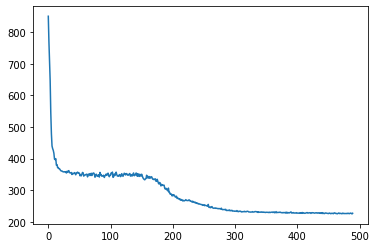

In [20]:
plt.plot(losses[10:])
np.argmin(losses)

In [ ]:
# convGNP linear
convcnp_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_linear_germany/epoch_498"
concnp_model = convGNPLinear()

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)
get_val_stats_bs(convcnp_preds, convcnp_targets)

RuntimeError: Error(s) in loading state_dict for convNP:
	Missing key(s) in state_dict: "decoder_1.in_conv.weight", "decoder_1.in_conv.bias", "decoder_1.resnet.0.conv.depthwise.weight", "decoder_1.resnet.0.conv.depthwise.bias", "decoder_1.resnet.0.conv.pointwise.weight", "decoder_1.resnet.0.conv.pointwise.bias", "decoder_1.resnet.0.depthwise.weight", "decoder_1.resnet.0.depthwise.bias", "decoder_1.resnet.0.pointwise.weight", "decoder_1.resnet.0.pointwise.bias", "decoder_1.resnet.1.conv.depthwise.weight", "decoder_1.resnet.1.conv.depthwise.bias", "decoder_1.resnet.1.conv.pointwise.weight", "decoder_1.resnet.1.conv.pointwise.bias", "decoder_1.resnet.1.depthwise.weight", "decoder_1.resnet.1.depthwise.bias", "decoder_1.resnet.1.pointwise.weight", "decoder_1.resnet.1.pointwise.bias", "decoder_1.resnet.2.conv.depthwise.weight", "decoder_1.resnet.2.conv.depthwise.bias", "decoder_1.resnet.2.conv.pointwise.weight", "decoder_1.resnet.2.conv.pointwise.bias", "decoder_1.resnet.2.depthwise.weight", "decoder_1.resnet.2.depthwise.bias", "decoder_1.resnet.2.pointwise.weight", "decoder_1.resnet.2.pointwise.bias", "decoder_1.out_mlp.mlp.0.weight", "decoder_1.out_mlp.mlp.0.bias", "decoder_1.out_mlp.mlp.2.0.weight", "decoder_1.out_mlp.mlp.2.0.bias", "decoder_1.out_mlp.mlp.3.0.weight", "decoder_1.out_mlp.mlp.3.0.bias", "decoder_1.out_mlp.mlp.4.0.weight", "decoder_1.out_mlp.mlp.4.0.bias", "decoder_1.out_mlp.mlp.5.0.weight", "decoder_1.out_mlp.mlp.5.0.bias", "decoder_1.out_mlp.mlp.6.weight", "decoder_1.out_mlp.mlp.6.bias", "decoder_2.in_conv.weight", "decoder_2.in_conv.bias", "decoder_2.resnet.0.conv.depthwise.weight", "decoder_2.resnet.0.conv.depthwise.bias", "decoder_2.resnet.0.conv.pointwise.weight", "decoder_2.resnet.0.conv.pointwise.bias", "decoder_2.resnet.0.depthwise.weight", "decoder_2.resnet.0.depthwise.bias", "decoder_2.resnet.0.pointwise.weight", "decoder_2.resnet.0.pointwise.bias", "decoder_2.resnet.1.conv.depthwise.weight", "decoder_2.resnet.1.conv.depthwise.bias", "decoder_2.resnet.1.conv.pointwise.weight", "decoder_2.resnet.1.conv.pointwise.bias", "decoder_2.resnet.1.depthwise.weight", "decoder_2.resnet.1.depthwise.bias", "decoder_2.resnet.1.pointwise.weight", "decoder_2.resnet.1.pointwise.bias", "decoder_2.resnet.2.conv.depthwise.weight", "decoder_2.resnet.2.conv.depthwise.bias", "decoder_2.resnet.2.conv.pointwise.weight", "decoder_2.resnet.2.conv.pointwise.bias", "decoder_2.resnet.2.depthwise.weight", "decoder_2.resnet.2.depthwise.bias", "decoder_2.resnet.2.pointwise.weight", "decoder_2.resnet.2.pointwise.bias", "decoder_2.out_mlp.mlp.0.weight", "decoder_2.out_mlp.mlp.0.bias", "decoder_2.out_mlp.mlp.2.0.weight", "decoder_2.out_mlp.mlp.2.0.bias", "decoder_2.out_mlp.mlp.3.0.weight", "decoder_2.out_mlp.mlp.3.0.bias", "decoder_2.out_mlp.mlp.4.0.weight", "decoder_2.out_mlp.mlp.4.0.bias", "decoder_2.out_mlp.mlp.5.0.weight", "decoder_2.out_mlp.mlp.5.0.bias", "decoder_2.out_mlp.mlp.6.weight", "decoder_2.out_mlp.mlp.6.bias". 
	Unexpected key(s) in state_dict: "decoder.in_conv.weight", "decoder.in_conv.bias", "decoder.resnet.0.conv.depthwise.weight", "decoder.resnet.0.conv.depthwise.bias", "decoder.resnet.0.conv.pointwise.weight", "decoder.resnet.0.conv.pointwise.bias", "decoder.resnet.0.depthwise.weight", "decoder.resnet.0.depthwise.bias", "decoder.resnet.0.pointwise.weight", "decoder.resnet.0.pointwise.bias", "decoder.resnet.1.conv.depthwise.weight", "decoder.resnet.1.conv.depthwise.bias", "decoder.resnet.1.conv.pointwise.weight", "decoder.resnet.1.conv.pointwise.bias", "decoder.resnet.1.depthwise.weight", "decoder.resnet.1.depthwise.bias", "decoder.resnet.1.pointwise.weight", "decoder.resnet.1.pointwise.bias", "decoder.resnet.2.conv.depthwise.weight", "decoder.resnet.2.conv.depthwise.bias", "decoder.resnet.2.conv.pointwise.weight", "decoder.resnet.2.conv.pointwise.bias", "decoder.resnet.2.depthwise.weight", "decoder.resnet.2.depthwise.bias", "decoder.resnet.2.pointwise.weight", "decoder.resnet.2.pointwise.bias", "decoder.resnet.3.conv.depthwise.weight", "decoder.resnet.3.conv.depthwise.bias", "decoder.resnet.3.conv.pointwise.weight", "decoder.resnet.3.conv.pointwise.bias", "decoder.resnet.3.depthwise.weight", "decoder.resnet.3.depthwise.bias", "decoder.resnet.3.pointwise.weight", "decoder.resnet.3.pointwise.bias", "decoder.resnet.4.conv.depthwise.weight", "decoder.resnet.4.conv.depthwise.bias", "decoder.resnet.4.conv.pointwise.weight", "decoder.resnet.4.conv.pointwise.bias", "decoder.resnet.4.depthwise.weight", "decoder.resnet.4.depthwise.bias", "decoder.resnet.4.pointwise.weight", "decoder.resnet.4.pointwise.bias", "decoder.resnet.5.conv.depthwise.weight", "decoder.resnet.5.conv.depthwise.bias", "decoder.resnet.5.conv.pointwise.weight", "decoder.resnet.5.conv.pointwise.bias", "decoder.resnet.5.depthwise.weight", "decoder.resnet.5.depthwise.bias", "decoder.resnet.5.pointwise.weight", "decoder.resnet.5.pointwise.bias", "decoder.out_mlp.mlp.0.weight", "decoder.out_mlp.mlp.0.bias", "decoder.out_mlp.mlp.2.0.weight", "decoder.out_mlp.mlp.2.0.bias", "decoder.out_mlp.mlp.3.0.weight", "decoder.out_mlp.mlp.3.0.bias", "decoder.out_mlp.mlp.4.0.weight", "decoder.out_mlp.mlp.4.0.bias", "decoder.out_mlp.mlp.5.0.weight", "decoder.out_mlp.mlp.5.0.bias", "decoder.out_mlp.mlp.6.weight", "decoder.out_mlp.mlp.6.bias". 
	size mismatch for elev_mlp.mlp.0.weight: copying a param with shape torch.Size([64, 133]) from checkpoint, the shape in current model is torch.Size([64, 5]).
	size mismatch for elev_mlp.mlp.6.weight: copying a param with shape torch.Size([130, 64]) from checkpoint, the shape in current model is torch.Size([2, 64]).
	size mismatch for elev_mlp.mlp.6.bias: copying a param with shape torch.Size([130]) from checkpoint, the shape in current model is torch.Size([2]).

convGNP - kvv kernel

In [24]:
exp_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_kvv_germany/"
losses = np.load(exp_path+"losses.npy")

383

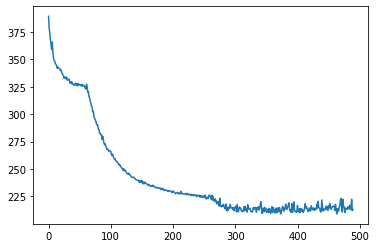

In [25]:
plt.plot(losses[10:])
np.argmin(losses)

In [37]:
# convGNP kvv
convcnp_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_kvv_germany/epoch_383"
concnp_model = convGNPKvv()

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)
get_val_stats_bs(convcnp_preds, convcnp_targets)

Mean absolute error: 0.9994873404502869
Pearson correlation: 0.9900997853234166
Spearman correlation: 0.9908312669775494


In [32]:
losses[383]

209.0610898199078

## convNP

In [13]:
exp_path = "/home/av555/iclr/exps_no_distance_scaling/convNP_germany/"
losses = np.load(exp_path+"losses.npy")

497

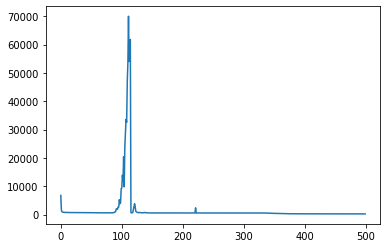

In [14]:
plt.plot(losses)
np.argmin(losses)

In [31]:
# convGNP kvv
convcnp_path = "/home/av555/iclr/exps_no_distance_scaling/convNP_germany/epoch_497"
concnp_model = convNP(
    ls = 0.02,
    n_samples=24,
    n_latent_vars=32)

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)

In [29]:
def get_val_stats_bs_convNP(predictions, targets): 

        maes = np.zeros(predictions.shape[2])
        spearmans = np.zeros(predictions.shape[2])
        pearsons = np.zeros(predictions.shape[2])

        for st in range(predictions.shape[2]):
            # Get station
            true_mean = targets[:, st]
            pred_mean = predictions[:,:, st,0]

            # Remove nans
            pred_mean = pred_mean[:,~np.isnan(true_mean)]
            true_mean = true_mean[~np.isnan(true_mean)]

            try:
                maes[st] = np.mean(np.abs(true_mean - pred_mean))
            except:
                maes[st] = np.nan
                continue
        print("Mean absolute error: {}".format(np.nanmedian(maes)))
        


In [30]:
get_val_stats_bs_convNP(convcnp_preds, convcnp_targets)

Mean absolute error: 1.1337901949882507


In [22]:
convcnp_preds.shape

(2, 2192, 250, 2)

In [23]:
losses[498]


252.9455274309431

In [23]:
convcnp_targets.shape

(2192, 250)